In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
# sys.path.append('/Users/user/PythonProjects/SpyDust/')

from SpyDust.Grain import *

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /opt/homebrew/Caskroom/miniconda/base/envs/SpyDust/lib/python3.13/site-packages/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored


/opt/homebrew/Caskroom/miniconda/base/envs/SpyDust/lib/python3.13/site-packages/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])


## Grain size and shape distribution

In [3]:
grain_obj = grain_distribution()
f_a_beta = grain_obj.shape_and_size_dist(6, a_weighted=True, normalize=True)
a_tab = grain_obj.a_tab
beta_tab = grain_obj.beta_tab


## An example of the angular momentum distribution: 
### $f(\Omega|a, \beta, \mu)$  (given grain properties)

In [8]:
DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

In [9]:
from SpyDust.util import cgsconst

debye = cgsconst.debye

dip_per_at = WNM_params['dipole'] / np.sqrt(N_C(1e-7) + N_H(1e-7)) * debye

aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmax(f_a_beta[aind, :])]
print(a, beta)

5.3382803478865665e-08 -0.3425


### $\beta$

In [16]:
beta

np.float64(-0.3425)

In [17]:
a_tab

array([3.63692806e-08, 3.92706459e-08, 4.24034681e-08, 4.57862116e-08,
       4.94388141e-08, 5.33828035e-08, 5.76414253e-08, 6.22397794e-08,
       6.72049679e-08, 7.25662551e-08, 7.83552398e-08, 8.46060418e-08,
       9.13555025e-08, 9.86434026e-08, 1.06512696e-07, 1.15009764e-07,
       1.24184686e-07, 1.34091540e-07, 1.44788714e-07, 1.56339257e-07,
       1.68811247e-07, 1.82278192e-07, 1.96819464e-07, 2.12520768e-07,
       2.29474647e-07, 2.47781025e-07, 2.67547796e-07, 2.88891465e-07,
       3.11937828e-07, 3.36822719e-07])

(-60.0, -10.0)

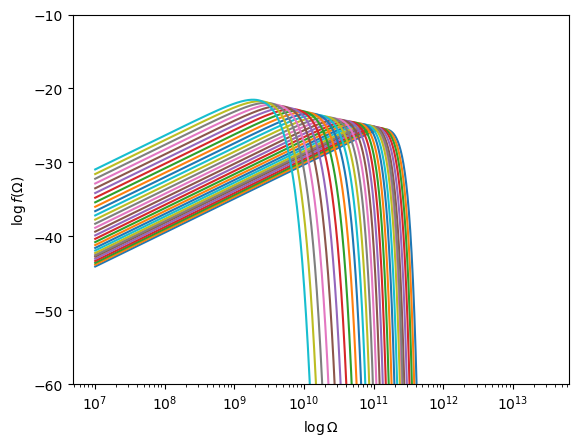

In [ ]:
from SpyDust.AngMomDist import log_f_rot
from SpyDust.charge_dist import charge_dist

env = WNM_params
# fZ = charge_dist(env, a, beta)
# Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
# mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
# mu_ip = np.array([mu_rms * np.sqrt(ip)])
# mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
#log_omegas, log_f_rot = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000) 

omegas = makelogtab(1e7, 3e13, 1000)
for a in a_tab:
    fZ = charge_dist(env, a, beta)
    Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
    mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
    mu_ip = np.array([mu_rms * np.sqrt(ip)])
    mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
    log_rot_dist = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000)[0]
    plt.plot(omegas, log_rot_dist)
plt.xscale('log')
plt.ylabel(r'$\log f(\Omega)$')
plt.xlabel(r'$\log \Omega$')
plt.ylim(-60, -10)


In [ ]:
omegas = makelogtab(1e7, 3e13, 1000)

def log_rotation(env, a, beta, mu, ip):
    fZ = charge_dist(env, a, beta)
    mu_ip = np.array([mu * np.sqrt(ip)])
    mu_op = np.array([mu * np.sqrt(1 - ip)])
    log_rot_dist = log_f_rot(env, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000)[0]
    return log_rot_dist

## Multiply with dipole, average over Gaussian dipole ensemble: 
$\tilde{f}_\perp(\Omega | a, \beta) \equiv  \int \mu_\perp^2 f(\Omega, \boldsymbol{\mu} | a, \beta ) \mathrm{d}^3\mu$

5.3382803478865665e-08 -0.04749999999999999


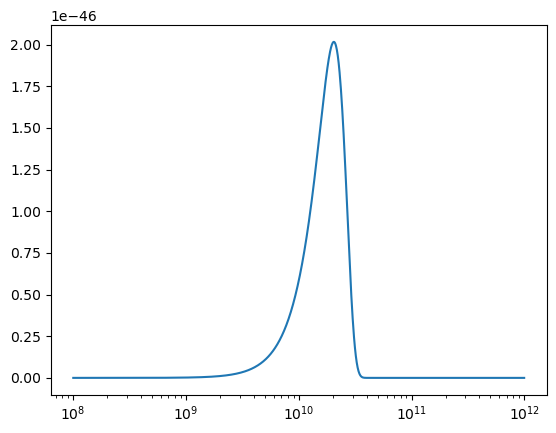

In [ ]:
from SpyDust.SED import mu2_f_cond, mu2_f, SED
aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmin(f_a_beta[aind, :])]
print(a, beta)

fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
mu_ip = np.array([mu_rms * np.sqrt(ip)])
mu_op = np.array([mu_rms * np.sqrt(1 - ip)])

mu2_f_cond_1, mu2_f_cond_2 = mu2_f_cond(env, a, beta, fZ, mu_rms, ip, 10, omega_min=1e8, omega_max=1e13, Nomega=1000)

omega = makelogtab(1e8, 1e12, 1000)
plt.plot(omega, mu2_f_cond_1+mu2_f_cond_2, label='ip')
#plt.plot(omega, mu2_f_cond_2, label='op', linestyle='--')
plt.xscale('log')

### Further marginalize the grain size
$\tilde{f}_\perp(\Omega, \beta) = \int \mathrm{d}a f(a, \beta) \tilde{f}_\perp(\Omega | a, \beta) $

In [8]:
mu2_f_mu_ensem = mu2_f(env, a_tab, beta_tab, f_a_beta, dip_per_at, ip, 10, omega_min=1e8, omega_max=1e15, Nomega=1000)

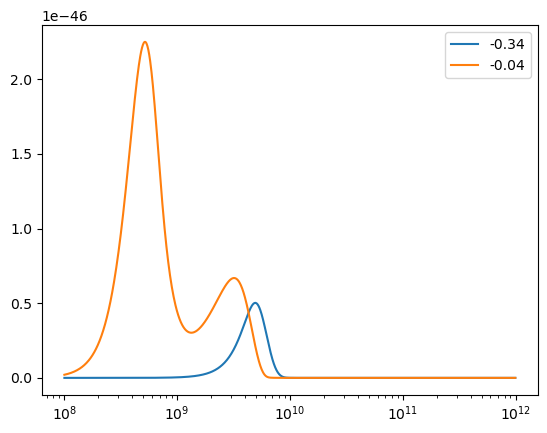

In [9]:
for i in range(len(beta_tab)):
    plt.plot(omega, mu2_f_mu_ensem[i, 0, :], label=str(beta_tab[i])[:5])
    plt.xscale('log')
plt.legend()

### Example SED of the given environment 

In [10]:
from SpyDust.SpyDust import SpyDust
min_freq=1 # in GHz
max_freq=200 # in GHz
n_freq=200
aux_SED = SpyDust(CNM_params, min_freq=min_freq, max_freq=max_freq, n_freq=n_freq)

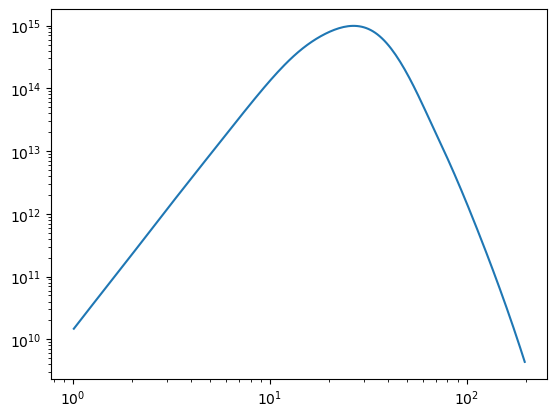

In [11]:
plt.loglog(aux_SED[0,:], aux_SED[1,:])

## Given specific dipole


5.3382803478865665e-08 -0.04749999999999999


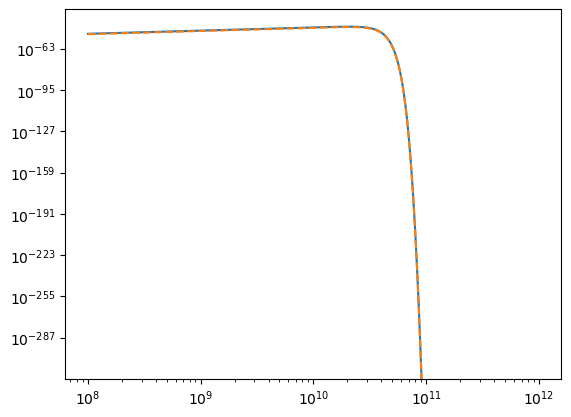

In [12]:
from SpyDust.SED import mu2_f_cond, mu2_f, SED
aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmin(f_a_beta[aind, :])]
print(a, beta)

fZ = charge_dist(env, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
mu_ip = np.array([mu_rms * np.sqrt(ip)])
mu_op = np.array([mu_rms * np.sqrt(1 - ip)])

mu2_f_cond_1, mu2_f_cond_2 = mu2_f_cond(env, a, beta, fZ, mu_rms, ip, 1, omega_min=1e8, omega_max=1e13, Nomega=1000)

omega = makelogtab(1e8, 1e12, 1000)
plt.loglog(omega, mu2_f_cond_1, label='ip')
plt.loglog(omega, mu2_f_cond_2, label='op', linestyle='--')

In [13]:
mu2_f_given_mu = mu2_f(env, a_tab, beta_tab, f_a_beta, dip_per_at, ip, 1, omega_min=1e8, omega_max=1e15, Nomega=1000)

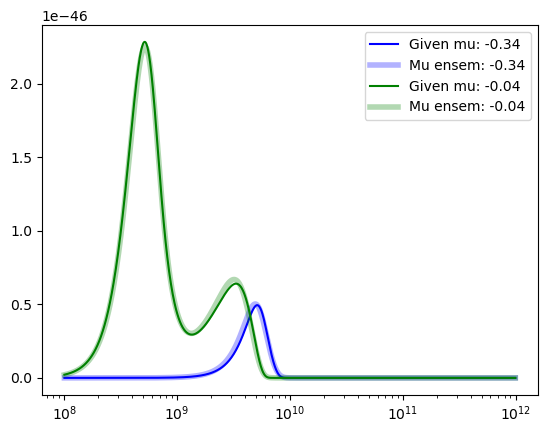

In [14]:
colors = ['blue', 'green', 'orange', 'purple', 'black']
for i in range(len(beta_tab)):
    plt.plot(omega, mu2_f_given_mu[i, 0, :], label="Given mu: "+str(beta_tab[i])[:5], color=colors[i], ls='-')
    plt.plot(omega, mu2_f_mu_ensem[i, 0, :], label="Mu ensem: "+str(beta_tab[i])[:5], color=colors[i], linewidth=4, alpha=0.3)
    plt.xscale('log')
plt.legend()

In [15]:
mu_sq_f_given_mu=np.sum(mu2_f_given_mu, axis=1)
mu_sq_f_mu_ensem=np.sum(mu2_f_mu_ensem, axis=1)
mu_sq_f_mu_ensem.shape

(2, 1000)

In [16]:
# add the path to the full_Stokes.py file
import sys
sys.path.append('../new/')
from full_Stokes import full_Stokes_SED

In [17]:
spd_beta_0 = full_Stokes_SED(Omega_grid=omega, rot_dist_grid=mu_sq_f_given_mu[0])
spd_beta_1 = full_Stokes_SED(Omega_grid=omega, rot_dist_grid=mu_sq_f_given_mu[1])


In [18]:
beta_tab

array([-0.3425, -0.0475])

In [32]:
from util import homogeneous_dist

obs_omegas = np.arange(1, 60, 0.1)*1e9/2*np.pi

full_stokes_result_0=spd_beta_0.generate_SED(obs_omegas, beta_tab[0], 2/3, 1,
                                                internal_dist=homogeneous_dist, 
                                                external_dist=homogeneous_dist, 
                                                max_workers=1, 
                                                full_Stokes=False)
full_stokes_result_1=spd_beta_1.generate_SED(obs_omegas, beta_tab[1], 2/3, 1,
                                                internal_dist=homogeneous_dist, 
                                                impulse=1,
                                                external_dist=homogeneous_dist, 
                                                max_workers=1, 
                                                full_Stokes=False)

In [20]:
beta_tab

array([-0.3425, -0.0475])

(1e-30, 1e-05)

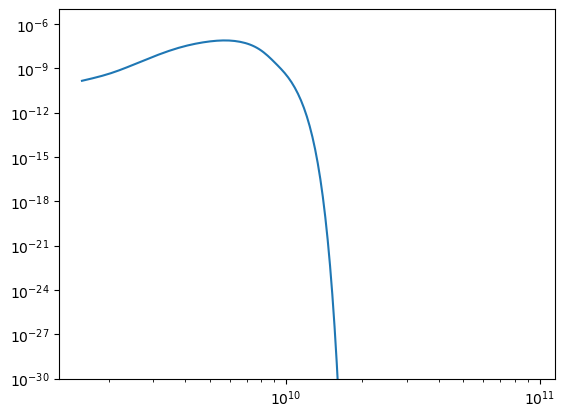

In [33]:
plt.loglog(obs_omegas, full_stokes_result_0[:])
plt.ylim(1e-30, 1e-5)